## Exploring the Impact of Weather and Climate on Bicycle Traffic in Köln: A Comprehensive Report

### Outline
1. Introduction<br>
2. Data Source Details<br>
    2.1. Datasource1: Bicycle Traffic Data in Köln<br>
    2.2. Datasource2: Weather and Climate Data of Köln<br>
3. Project Structure: ETL Pipeline<br>
4. Install Dependencies and Load Data<br>
    4.1. Import Packages<br>
    4.2. Load Data<br>
5. Data Exploration<br>
    5.1. Exploration of the Mobilithek Bicycle Traffic Data in Köln<br>
    5.2. Exploration of the Meteostat Weather and Climate Data of Köln<br>
    5.3. Exploration Summary<br>
6. Modifying and Combining Two Data Sources<br>
    6.1. Modifiying Bicycle Traffic Data in Köln<br>
    6.2. Weather and Climate Data of Köln<br>
    6.3. Combining Two Data Sources<br>
7. Exploratory Data Analysis (EDA)<br>
    7.1. Descriptive Statistics<br>
    7.2. Histograms<br>
    7.3. Box Plots<br>
8. Questions and Analysis<br>
    8.1. How does the temperature in Köln city vary throughout the years?<br>
    8.2. How does the bicycle traffic in Köln city vary throughout the years?<br>
    8.3. Does temperature affect bicycle traffic in Köln city?<br>
    8.4. Is there any relation between the monthly precipitation total and average sea-level air pressure on the total bicycle traffic in Köln?<br>
    8.5. How do wind speed and sunshine duration impact the total bicycle traffic in Köln?<br>
9. Conclusion<br>

### 1. Introduction

This project aims to analyze **the weather and climate conditions of Köln and its bicycle traffic** generated from several automatic counting stations throughout the city to determine if Köln is a suitable city for an enthusiastic cyclist to live in. The project is using two open data sources: [mobilithek](https://mobilithek.info/), which contains information on bicycle traffic in Köln, and [meteostat](https://meteostat.net/en/), which provides weather and climate data of Köln.

Now, the question that interests us is: **How do the weather conditions in Köln impact bicycle traffic throughout the year?** And we will try to answer this question by focusing on several short questions.

1. How does the temperature in Köln city vary throughout the years?
2. How does the bicycle traffic in Köln city vary throughout the years?
3. Does temperature affect bicycle traffic in Köln city?
4. Is there any relation between the monthly precipitation total and average sea-level air pressure on the total bicycle traffic in Köln?
5. How do wind speed and sunshine duration impact the total bicycle traffic in Köln?

### 2. Data Source Details
#### 2.1. Datasource1: Bicycle Traffic Data in Köln
* Source: [mobilithek](https://mobilithek.info/)
* Metadata URL: [https://mobilithek.info/offers/-2236641647976866002](https://mobilithek.info/offers/-2236641647976866002)
* Sample Data URL: [https://offenedaten-koeln.de/sites/default/files/Fahrrad_Zaehlstellen_Koeln_2016.csv](https://offenedaten-koeln.de/sites/default/files/Fahrrad_Zaehlstellen_Koeln_2016.csv)
* Data Type: CSV

This data source contains Köln's bicycle traffic generated from several [automatic counting stations](http://www.eco-public.com/ParcPublic/?id=677) throughout the city from 2009.

#### 2.2. Datasource2: Weather and Climate Data of Köln
* Source: [meteostat](https://meteostat.net/en/)
* Metadata URL: [https://dev.meteostat.net/bulk/monthly.html](https://dev.meteostat.net/bulk/monthly.html)
* Sample Data URL: [https://bulk.meteostat.net/v2/monthly/{station}.csv.gz](https://bulk.meteostat.net/v2/monthly/{station}.csv.gz), Station-id of Köln = '10513', 'D2968'
* Data Type: CSV

This data source will provide weather and climate data in Köln, including average air temperature, daily minimum and maximum air temperature, monthly precipitation total, maximum snow depth, average wind direction and speed, peak wind gust, average sea-level air pressure, and monthly sunshine total.

### 3. Project Structure: ETL Pipeline

The project follows a structured ETL (Extract, Transform, Load) pipeline approach, encompassing various directories and modules with specific functionalities. The `main.py` serves as the entry point for running the pipeline using the command `pdm run main.py`, resulting in the generation of the final dataset stored in an SQLite database.

```bash
project/
├── config/                     # Configuration files and settings
│   ├── __init__.py
│   ├── config_var.py           # Configuration variables
│   └── source_info.json        # Source information
├── data/                       # Data directory
│   ├── processed/              # Processed data
│   └── raw/                    # Raw data
├── etl/                        # ETL (Extract, Transform, Load) pipeline modules
│   ├── __init__.py
│   ├── extract/                # Extraction module
│   │   ├── __init__.py
│   │   └── data_extractor.py   # Data extraction logic
│   ├──transform/               # Transformation module
│   │   ├── __init__.py
│   │   └── data_transformer.py # Data transformation logic
│   └── load/                   # Loading module
│       ├── __init__.py
│       └── data_loader.py      # Data loading logic
├── pipelines/                  # Data pipeline modules
│   ├── __init__.py
│   └── data_pipeline.py        # ETL data pipeline implementation
├── utils/                      # Utility modules
│   ├── __init__.py
│   └── service_factory.py      # Service factory utility
├── tests/                      # Test modules
│   ├── __init__.py
│   ├── test_component.py       # Test cases for component testing
│   ├── test_pipeline.py        # Test cases for system testing
│   └── transformed_data.pkl    # Original transformed data for testing purposes
├── main.py                     # Entry point of the project
├── tests.sh                    # Bash script for running all the test cases
├── exploration.ipynb           # Notebook for data exploration
├── report.ipynb                # Notebook for final project report
└── project-plan.md             # Project plan and documentation
```

### 4. Install Dependencies and Load Data

To install the dependencies for this project, run the following command to install the dependencies specified in the `requirements.txt` file: `pip install -r requirements.txt`

In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### 4.1. Import Packages

In [2]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

#### 4.2. Load Data

This section involves retrieving the data from a sqlite database and loading it into two Pandas DataFrames. And then merge these together for creating comprehensive report.

In [3]:
conn = sqlite3.connect("fau_data_engineering_ss23.sqlite")
bicycle_traffic_df = pd.read_sql_query(f"SELECT * FROM mobilithek_bicycle_traffic", conn)
weather_data_df = pd.read_sql_query(f"SELECT * FROM meteostat_weather_data", conn)
conn.close()

In [4]:
bicycle_traffic_df.head()

,Date,Deutzer Brücke,Hohenzollernbrücke,Neumarkt,Zülpicher Straße,Bonner Straße,Venloer Straße,A.-Schütte-Allee,Vorgebirgspark,A.-Silbermann-Weg,Stadtwald,Niederländer Ufer,Vorgebirgswall,Universitäts-straße,Rodenkirchener Brücke,Severinsbrücke,Neusser Straße,Hohe Pforte
0,January-2009,46319,24610,59344,78727,0,0,0,0,0,0,0,0,0,0,0,0,0
1,February-2009,47764,29590,62228,91075,0,0,0,0,0,0,0,0,0,0,0,0,0
2,March-2009,68778,44312,84760,107262,0,0,0,0,0,0,0,0,0,0,0,0,0
3,April-2009,78619,55086,95298,146057,0,0,0,0,0,0,0,0,0,0,0,0,0
4,May-2009,79369,52725,102051,159319,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Convert None to NaN in weather_data_df
weather_data_df = weather_data_df.where(pd.notnull(weather_data_df), np.nan)
# Convert dtype of tsun_D2968 column from object to float
weather_data_df["tsun_D2968"] = weather_data_df["tsun_D2968"].astype(float)
weather_data_df.head()

,date,tavg_10513,tmin_10513,tmax_10513,prcp_10513,wspd_10513,pres_10513,tsun_10513,tavg_D2968,tmin_D2968,tmax_D2968,prcp_D2968,wspd_D2968,pres_D2968,tsun_D2968
0,January-2009,-0.5,-4.4,2.9,26.0,11.1,1015.2,5340.0,0.4,-2.6,3.4,36.9,NaN,NaN,NaN
1,February-2009,3.1,0.0,6.2,70.0,12.3,1014.5,1800.0,3.8,1.2,6.4,71.0,NaN,NaN,NaN
2,March-2009,6.1,1.7,10.5,104.0,12.6,1014.9,5460.0,6.9,3.3,10.6,100.0,NaN,NaN,NaN
3,April-2009,13.3,6.8,19.1,78.0,10.0,1014.0,11220.0,14.0,8.8,19.0,59.2,NaN,NaN,NaN
4,May-2009,14.5,8.0,20.1,63.0,10.8,1019.2,11940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5. Data Exploration

This section focuses on exploring two sets of data further: [Mobilithek Bicycle Traffic Data in Köln](https://mobilithek.info/offers/-2236641647976866002) and [Meteostat Weather and Climate Data of Köln](https://dev.meteostat.net/bulk/monthly.html).

#### 5.1. Exploration of the Mobilithek Bicycle Traffic Data in Köln

In [6]:
bicycle_traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   168 non-null    object
 1   Deutzer Brücke         168 non-null    int64 
 2   Hohenzollernbrücke     168 non-null    int64 
 3   Neumarkt               168 non-null    int64 
 4   Zülpicher Straße       168 non-null    int64 
 5   Bonner Straße          168 non-null    int64 
 6   Venloer Straße         168 non-null    int64 
 7   A.-Schütte-Allee       168 non-null    int64 
 8   Vorgebirgspark         168 non-null    int64 
 9   A.-Silbermann-Weg      168 non-null    int64 
 10  Stadtwald              168 non-null    int64 
 11  Niederländer Ufer      168 non-null    int64 
 12  Vorgebirgswall         168 non-null    int64 
 13  Universitäts-straße    168 non-null    int64 
 14  Rodenkirchener Brücke  168 non-null    int64 
 15  Severinsbrücke         

Now, let's examine the date range of the 'Bicycle Traffic Data in Köln' to determine the available data period, starting from the minimum date and ending at the maximum date.

In [7]:
date_df = pd.to_datetime(bicycle_traffic_df['Date'], format='%B-%Y')
min_date = date_df.min().strftime('%B-%Y')
max_date = date_df.max().strftime('%B-%Y')
f"Date Range of the Bicycle Traffic Data in Köln: {min_date} to {max_date}"

'Date Range of the Bicycle Traffic Data in Köln: January-2009 to December-2022'

In [8]:
bicycle_traffic_df.head(6)

,Date,Deutzer Brücke,Hohenzollernbrücke,Neumarkt,Zülpicher Straße,Bonner Straße,Venloer Straße,A.-Schütte-Allee,Vorgebirgspark,A.-Silbermann-Weg,Stadtwald,Niederländer Ufer,Vorgebirgswall,Universitäts-straße,Rodenkirchener Brücke,Severinsbrücke,Neusser Straße,Hohe Pforte
0,January-2009,46319,24610,59344,78727,0,0,0,0,0,0,0,0,0,0,0,0,0
1,February-2009,47764,29590,62228,91075,0,0,0,0,0,0,0,0,0,0,0,0,0
2,March-2009,68778,44312,84760,107262,0,0,0,0,0,0,0,0,0,0,0,0,0
3,April-2009,78619,55086,95298,146057,0,0,0,0,0,0,0,0,0,0,0,0,0
4,May-2009,79369,52725,102051,159319,0,0,0,0,0,0,0,0,0,0,0,0,0
5,June-2009,85576,51538,131255,160123,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
bicycle_traffic_df.tail(6)

,Date,Deutzer Brücke,Hohenzollernbrücke,Neumarkt,Zülpicher Straße,Bonner Straße,Venloer Straße,A.-Schütte-Allee,Vorgebirgspark,A.-Silbermann-Weg,Stadtwald,Niederländer Ufer,Vorgebirgswall,Universitäts-straße,Rodenkirchener Brücke,Severinsbrücke,Neusser Straße,Hohe Pforte
162,July-2022,160142,78793,144518,155971,83698,181380,82110,35634,94880,82634,92596,89681,90651,69970,50351,104689,95068
163,August-2022,199040,104883,161798,174193,99881,207493,98258,45461,113437,116920,113372,124947,99332,84308,65845,128545,112127
164,September-2022,159829,79025,137943,163504,85979,178292,69677,34505,84756,78143,77222,100410,100228,55764,54330,105910,95742
165,October-2022,152882,75197,136711,172506,85703,189374,68128,31347,90212,75335,73277,96018,176722,51947,52062,104598,94887
166,November-2022,135685,69464,122413,162549,77491,169261,48256,28750,75998,65878,57586,93465,176539,41001,47036,99518,93621
167,December-2022,84232,43723,90147,105479,59919,121938,26591,18024,47965,32779,31445,62247,111549,20481,27754,70152,75571


By examining the head and tail of the Mobilithek Bicycle Traffic Data in Köln, we can observe that initially not all counting stations recorded bicycle traffic counts. Hence, we can verify the number of counting stations based on the date.

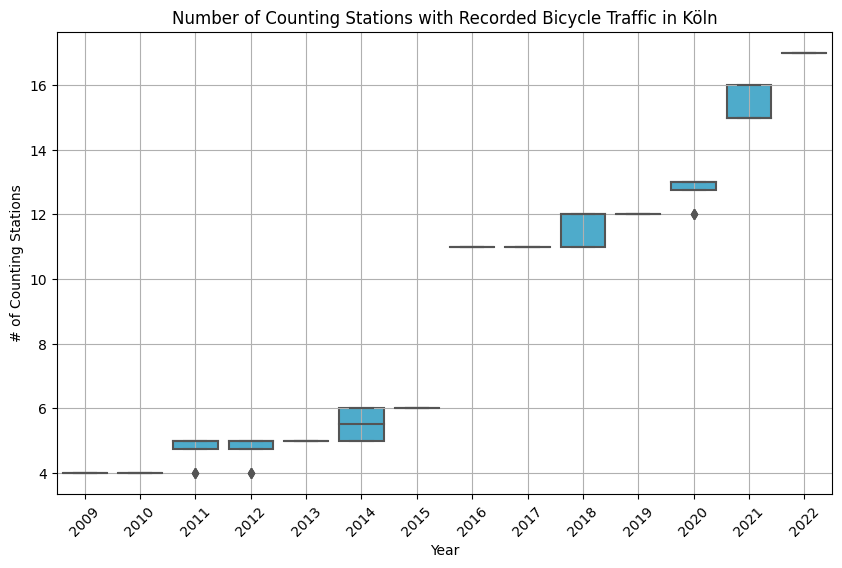

In [10]:
# Calculate the stations count for each year
counting_stations_df = pd.DataFrame({'Date': bicycle_traffic_df['Date']})
counting_stations_df['Counting Stations'] = (bicycle_traffic_df.iloc[:, 1:] != 0).sum(axis=1)

# Extract the year from the date column
counting_stations_df['Year'] = counting_stations_df['Date'].str.split('-').str[1]

plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(data=counting_stations_df, x='Year', y='Counting Stations', color='#39B5E0')  # Create the box plot

# Customize the plot
plt.title('Number of Counting Stations with Recorded Bicycle Traffic in Köln')
plt.xlabel('Year')
plt.ylabel('# of Counting Stations')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

Among the 17 counting stations from 2009 to 2022, the number of stations that started counting Bicycle Traffic from the beginning varies. To analyze this, we can examine the stacked bar chart showing the zero count and non-zero count for each station. The chart provides insights into which stations have consistently recorded Bicycle Traffic data since the beginning, as well as stations that started counting at a later time. This information helps us understand the availability and reliability of historical data across different stations.

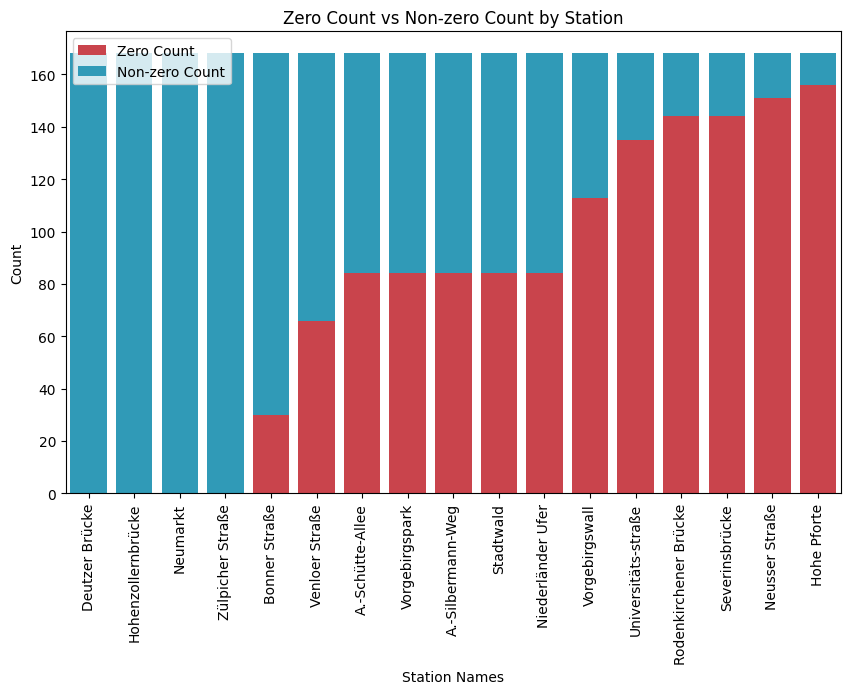

In [11]:
station_names = bicycle_traffic_df.columns[1:]
result_df = pd.DataFrame(columns=['station name', 'zero count', 'non zero count'])

for station_name in station_names:
    zero_count = (bicycle_traffic_df[station_name] == 0).sum()
    non_zero_count = (bicycle_traffic_df[station_name] != 0).sum()
    result_df.loc[len(result_df)] = [station_name, zero_count, non_zero_count]

# Create and customize the stacked bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(data=result_df, x='station name', y='zero count', color='#DF2E38', label='Zero Count')
sns.barplot(data=result_df, x='station name', y='non zero count', color='#19A7CE', bottom=result_df['zero count'], label='Non-zero Count')

# Customize the chart labels and title
plt.title('Zero Count vs Non-zero Count by Station')
plt.xlabel('Station Names')
plt.ylabel('Count')
# plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

#### 5.2. Exploration of the Meteostat Weather and Climate Data of Köln

Station Details of Köln:
- Station ID: 10513, Station Name: Köln-Bonn Airport, Station Region: NW
- Station ID: D2968, Station Name: Köln-Stammheim, Station Region: NW

In [12]:
weather_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        168 non-null    object 
 1   tavg_10513  168 non-null    float64
 2   tmin_10513  168 non-null    float64
 3   tmax_10513  168 non-null    float64
 4   prcp_10513  168 non-null    float64
 5   wspd_10513  168 non-null    float64
 6   pres_10513  168 non-null    float64
 7   tsun_10513  168 non-null    float64
 8   tavg_D2968  166 non-null    float64
 9   tmin_D2968  166 non-null    float64
 10  tmax_D2968  166 non-null    float64
 11  prcp_D2968  164 non-null    float64
 12  wspd_D2968  21 non-null     float64
 13  pres_D2968  21 non-null     float64
 14  tsun_D2968  0 non-null      float64
dtypes: float64(14), object(1)
memory usage: 19.8+ KB


Now, let's examine the date range of the 'Weather and Climate Data of Köln' to determine the available data period, starting from the minimum date and ending at the maximum date.

In [13]:
date_df = pd.to_datetime(weather_data_df['date'], format='%B-%Y')
min_date = date_df.min().strftime('%B-%Y')
max_date = date_df.max().strftime('%B-%Y')
f"Date Range of the Weather and Climate Data of Köln: {min_date} to {max_date}"

'Date Range of the Weather and Climate Data of Köln: January-2009 to December-2022'

Now, examining the 'Weather and Climate Data of Köln', it is apparent that the dataset contains a significant number of `null` values. Visualizing these `null` values allows us to assess their severity and identify columns that should be excluded from our reports.

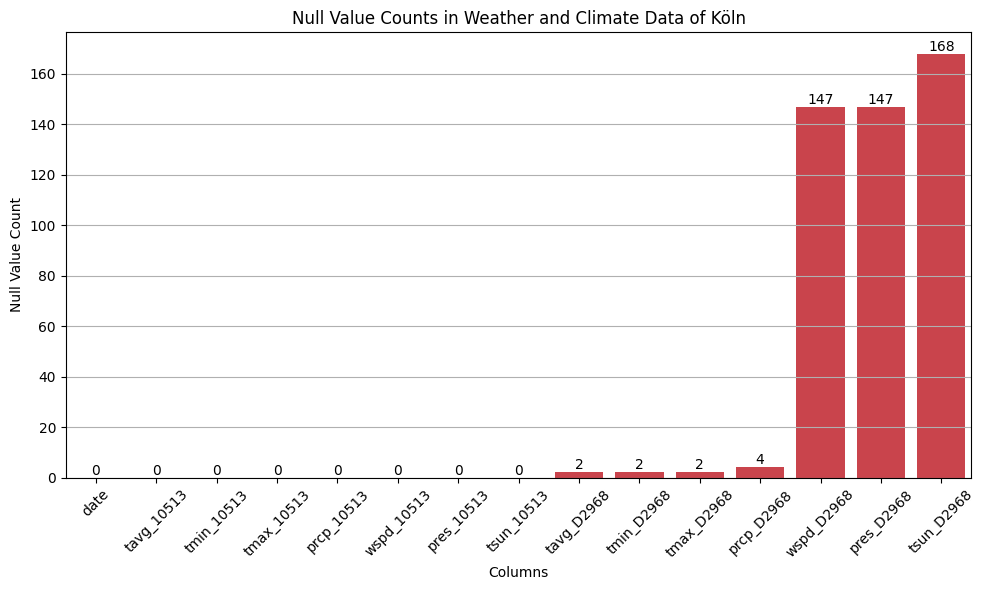

In [14]:
# Count the number of null values in each column
null_counts = weather_data_df.isnull().sum()

# Create a bar plot of null value counts
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=null_counts.index, y=null_counts, color='#DF2E38')

plt.title('Null Value Counts in Weather and Climate Data of Köln')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add text annotations for null count above each bar
for i, count in enumerate(null_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### 5.3. Exploration Summary

**Bicycle Traffic Data in Köln**
* Stations count: Total 17 stations
* Data available: January-2009 to December-2022
* No of rows: 168 (14 years * 12 = 168)
* Remarks:
    - Number of stations that started counting Bicycle Traffic from the beginning varies a lot
    - Only 4 stations (Deutzer Brücke, Hohenzollernbrücke, Neumarkt, Zülpicher Straße) has started counting Bicycle Traffic from 2009

**Weather and Climate Data of Köln**
* Station details of Köln: Köln-Bonn Airport (10513), Köln-Stammheim (D2968)
* Data available: January-2009 to December-2022
* No of rows: 168 (14 years * 12 = 168)
* Remarks: wspd (average wind speed), pres (average sea-level air pressure), and tsun (monthly sunshine total) of station Köln-Stammheim (D2968) has high number of null count

### 6. Modifying and Combining Two Data Sources

#### 6.1. Modifiying Bicycle Traffic Data in Köln

Based on the previous data exploration, it is evident that only four stations (Deutzer Brücke, Hohenzollernbrücke, Neumarkt, Zülpicher Straße) have been consistently recording bicycle traffic since 2009. To analyze the overall bicycle traffic in Köln, we will focus on these specific columns and calculate the sum of their traffic values. The resulting column, 'Total Traffic', will represent the aggregated bicycle traffic for the city of Köln.

In [15]:
# Select the desired stations from the bicycle_traffic_df
col_sub_set = ["Date", "Deutzer Brücke", "Hohenzollernbrücke", "Neumarkt", "Zülpicher Straße"]
bicycle_traffic_final_df = bicycle_traffic_df[col_sub_set].copy()

# Calculate the total traffic by summing the values of the selected stations
bicycle_traffic_final_df['total_traffic'] = bicycle_traffic_final_df[col_sub_set[1:]].sum(axis=1)

# Rename desired columns and drop the individual station traffic columns, keeping only the 'date' and 'total_traffic' columns
bicycle_traffic_final_df.rename(columns={'Date': 'date'}, inplace=True)
bicycle_traffic_final_df.drop(col_sub_set[1:], axis=1, inplace=True)

bicycle_traffic_final_df

,date,total_traffic
0,January-2009,209000
1,February-2009,230657
2,March-2009,305112
3,April-2009,375060
4,May-2009,393464
...,...,...
163,August-2022,639914
164,September-2022,540301
165,October-2022,537296
166,November-2022,490111


#### 6.2. Weather and Climate Data of Köln

Based on the previous data exploration, we need to make the following changes in the weather data for Köln city:
- Drop the columns with a high null count for station D2968: 'wspd_D2968', 'pres_D2968', 'tsun_D2968'. These columns have a significant number of missing values and are not suitable for analysis.
- Fill in the missing values for the remaining columns with a few null counts. This can be done using methods like linear interpolation, which estimates the missing values based on nearby values.
- Calculate the aggregated values for tavg, tmin, tmax, and prcp to represent the combined values for Köln city. This involves taking the average of the corresponding columns from the two stations, 'tavg_10513' and 'tavg_D2968', 'tmin_10513' and 'tmin_D2968', 'tmax_10513' and 'tmax_D2968', 'prcp_10513' and 'prcp_D2968', respectively.
- Consider the column 'wspd_10513' as the combined 'wspd' (average wind speed) for Köln city. Similarly, 'pres_10513' represents the combined 'pres' (average sea-level air pressure), and 'tsun_10513' represents the combined 'tsun' (monthly sunshine total) for Köln city.

In [16]:
# Create a copy of the weather_data_df DataFrame and drop the columns with high null count for station D2968
weather_data_final_df = weather_data_df.copy()
weather_data_final_df.drop(['wspd_D2968', 'pres_D2968', 'tsun_D2968'], axis=1, inplace=True)

# Perform linear interpolation to fill missing values using nearby values
weather_data_final_df.interpolate(method ='linear', limit_direction ='forward', inplace=True)

# Calculate the mean of tavg, tmin, tmax, and prcp columns for the two stations and drop individual columns
for col in ['tavg', 'tmin', 'tmax', 'prcp']:
    weather_data_final_df[col] = weather_data_final_df[[col+'_10513', col+'_D2968']].mean(axis=1)
    weather_data_final_df.drop([col+'_10513', col+'_D2968'], axis=1, inplace=True)

# Rename columns to match the desired column names and rearrange the columns in the desired order
weather_data_final_df.rename(columns={'wspd_10513': 'wspd', 'pres_10513': 'pres', 'tsun_10513': 'tsun'}, inplace=True)
weather_data_final_df = weather_data_final_df[['date', 'tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'pres', 'tsun']]

weather_data_final_df

,date,tavg,tmin,tmax,prcp,wspd,pres,tsun
0,January-2009,-0.05,-3.50,3.15,31.450,11.1,1015.2,5340.0
1,February-2009,3.45,0.60,6.30,70.500,12.3,1014.5,1800.0
2,March-2009,6.50,2.50,10.55,102.000,12.6,1014.9,5460.0
3,April-2009,13.65,7.80,19.05,68.600,10.0,1014.0,11220.0
4,May-2009,15.00,9.30,20.25,57.175,10.8,1019.2,11940.0
...,...,...,...,...,...,...,...,...
163,August-2022,22.10,14.75,28.80,16.100,9.8,1016.1,16771.0
164,September-2022,15.35,10.85,20.45,130.950,10.6,1012.3,9393.0
165,October-2022,14.05,9.50,18.85,32.700,11.0,1017.9,7416.0
166,November-2022,9.30,6.30,12.45,65.900,13.2,1012.5,4865.0


#### 6.3. Combining Two Data Sources

Now, let's combine the modified bicycle traffic data and weather data into a single dataframe, which will represent the data for Köln city. The combined dataframe will contain the following columns:

- date: the date in the month-year format.
- tavg: the average air temperature in °C.
- tmin: the average daily minimum air temperature in °C.
- tmax: the average daily maximum air temperature in °C.
- prcp: the monthly precipitation total in mm.
- wspd: the average wind speed in km/h.
- pres: the average sea-level air pressure in hPa.
- tsun: the monthly sunshine total in minutes.
- total_traffic: the total bicycle traffic of the 4 stations (Deutzer Brücke, Hohenzollernbrücke, Neumarkt, Zülpicher Straße) for Köln city.

In [17]:
final_combined_df = pd.merge(weather_data_final_df, bicycle_traffic_final_df, on='date')
final_combined_df

,date,tavg,tmin,tmax,prcp,wspd,pres,tsun,total_traffic
0,January-2009,-0.05,-3.50,3.15,31.450,11.1,1015.2,5340.0,209000
1,February-2009,3.45,0.60,6.30,70.500,12.3,1014.5,1800.0,230657
2,March-2009,6.50,2.50,10.55,102.000,12.6,1014.9,5460.0,305112
3,April-2009,13.65,7.80,19.05,68.600,10.0,1014.0,11220.0,375060
4,May-2009,15.00,9.30,20.25,57.175,10.8,1019.2,11940.0,393464
...,...,...,...,...,...,...,...,...,...
163,August-2022,22.10,14.75,28.80,16.100,9.8,1016.1,16771.0,639914
164,September-2022,15.35,10.85,20.45,130.950,10.6,1012.3,9393.0,540301
165,October-2022,14.05,9.50,18.85,32.700,11.0,1017.9,7416.0,537296
166,November-2022,9.30,6.30,12.45,65.900,13.2,1012.5,4865.0,490111


### 7. Exploratory Data Analysis (EDA)

#### 7.1. Descriptive Statistics

In [18]:
final_combined_df.describe()

,tavg,tmin,tmax,prcp,wspd,pres,tsun,total_traffic
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,11.464286,6.956994,15.941964,62.984970,11.520833,1015.980952,8100.952381,431626.642857
std,6.029993,5.051886,7.191065,35.784608,1.714777,4.128417,4533.585037,128822.055010
min,-1.200000,-3.900000,0.800000,4.900000,8.000000,1004.000000,552.000000,65442.000000
25%,6.237500,2.887500,9.300000,38.725000,10.400000,1013.875000,4305.000000,328848.500000
50%,11.525000,6.700000,16.175000,56.925000,11.200000,1016.000000,8145.000000,449497.500000
75%,16.737500,11.262500,22.250000,77.937500,12.425000,1018.125000,11550.000000,530818.750000
max,22.400000,16.150000,29.400000,209.750000,19.700000,1029.200000,18600.000000,673559.000000


The `describe()` function was used to generate descriptive statistics for the numerical columns in the dataset, including count, mean, standard deviation, minimum, quartiles, and maximum values.

#### 7.2. Histograms

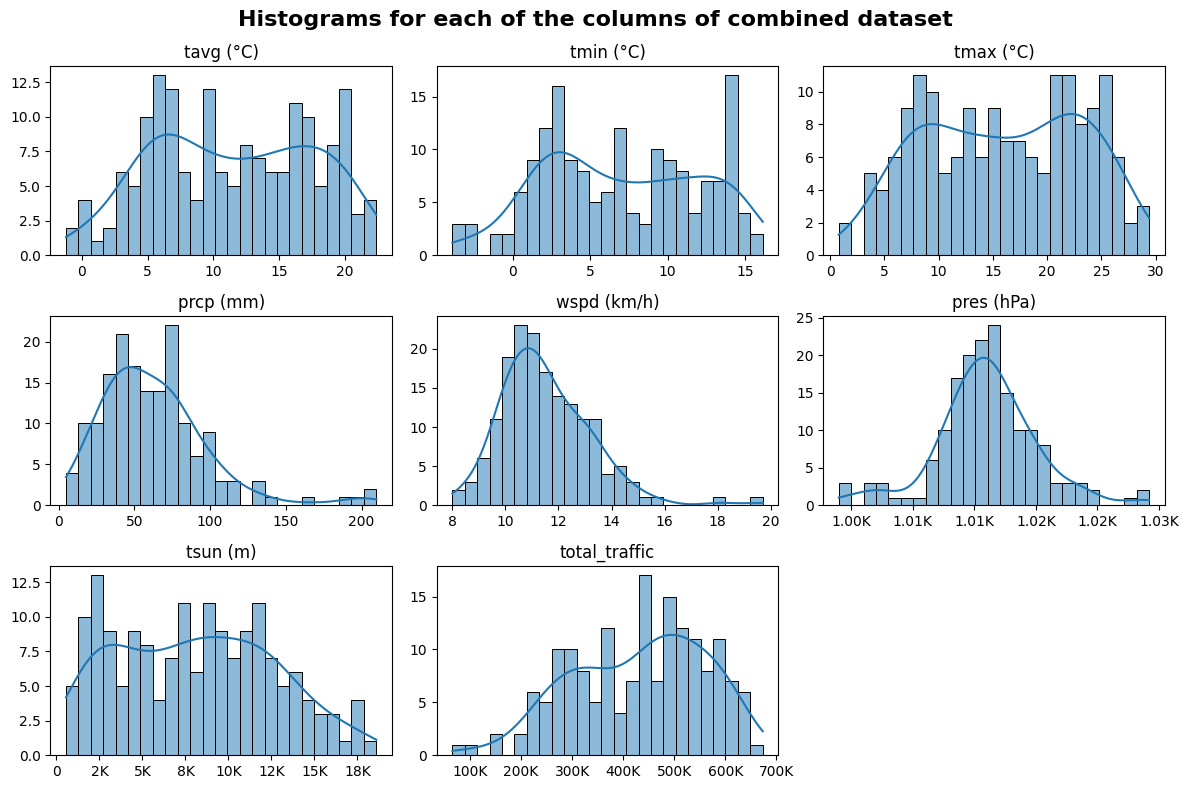

In [19]:
# Plot histograms
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
cols = ['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'pres', 'tsun', 'total_traffic']
cols_name = ['tavg (°C)', 'tmin (°C)', 'tmax (°C)', 'prcp (mm)', 'wspd (km/h)', 'pres (hPa)', 'tsun (m)', 'total_traffic']

for i, col in enumerate(cols):
    ax = axes[i//3, i%3]
    sns.histplot(data=final_combined_df, x=col, ax=ax, bins=25, kde=True)
    ax.set_title(cols_name[i])
    ax.set_xlabel('')
    ax.set_ylabel('')

    if col == 'pres':
        ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000) + 'K' if x >= 1000 else '{:g}'.format(x)))
    else:
        ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K' if x >= 1000 else '{:g}'.format(x)))

fig.delaxes(axes[2, 2]) # Remove empty subplot and hide axis labels

plt.suptitle('Histograms for each of the columns of combined dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

- Histograms were created for each of the columns and it shows the distribution of values for columns such as `tavg`, `tmin`, `tmax`, `prcp`, `wspd`, `pres`, `tsun`, and `total_traffic`.
- The number of bins was set to 25, and kernel density estimation (KDE) was enabled to visualize the underlying distribution.

#### 7.3. Box Plots

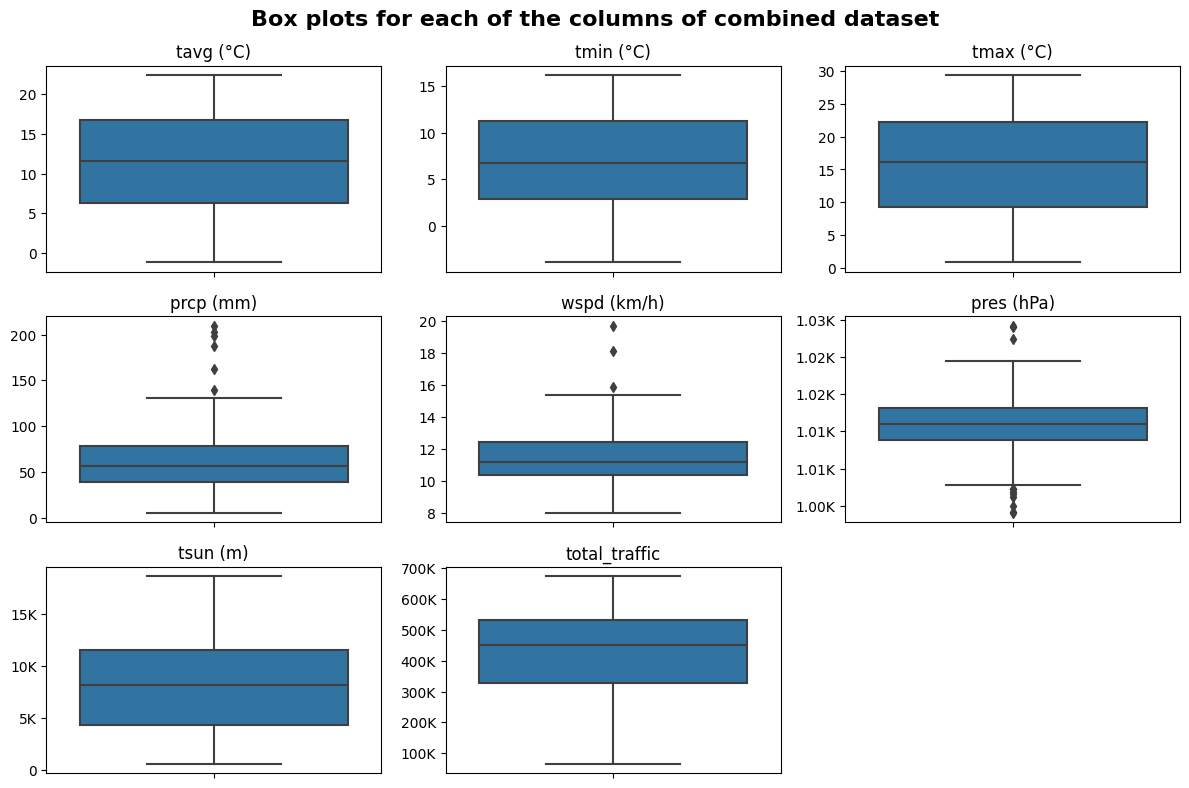

In [20]:
# Create box plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
for i, col in enumerate(cols):
    ax = axes[i//3, i%3]
    sns.boxplot(data=final_combined_df, y=col, ax=ax)
    ax.set_title(cols_name[i])
    ax.set_ylabel('')

    if col == 'pres':
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000) + 'K' if y >= 1000 else '{:g}'.format(y)))
    else:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K' if y >= 1000 else '{:g}'.format(y)))

fig.delaxes(axes[2, 2]) # Remove empty subplot and hide axis labels

plt.suptitle('Box plots for each of the columns of combined dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Box plots were created for each of the columns and each box plot provide information about the distribution, central tendency, and presence of outliers in the variables.

### 8. Questions and Analysis

#### 8.1. How does the temperature in Köln city vary throughout the years?

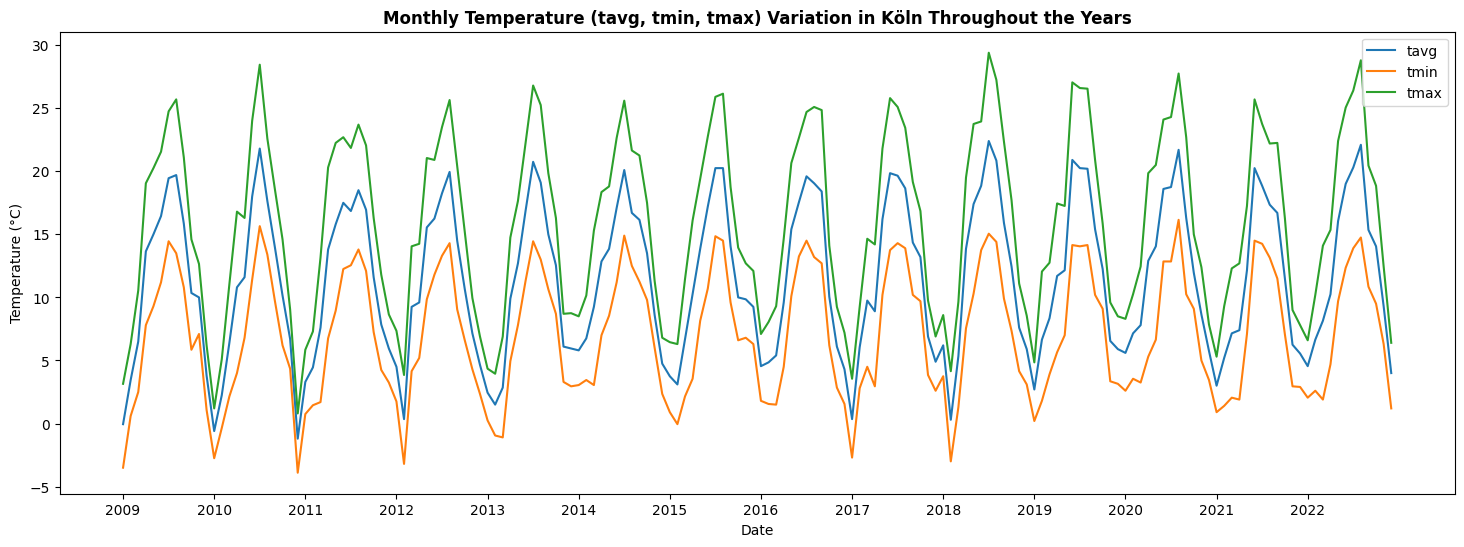

In [21]:
# Line plot of temperature variation
plt.figure(figsize=(18, 6))

for col in ['tavg', 'tmin', 'tmax']:
    sns.lineplot(data=final_combined_df, x='date', y=col, label=col)

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Temperature (tavg, tmin, tmax) Variation in Köln Throughout the Years', fontweight='bold')
plt.legend(loc="upper right")
plt.xticks(range(0, len(final_combined_df), 12), final_combined_df['date'].iloc[::12].str[-4:], rotation=0)
plt.show()

The temperature in Köln city exhibits significant variation throughout the years, following a seasonal pattern. It typically shows higher values during the summer months and lower values during the winter months. This variation can be observed by analyzing the average temperature (tavg), minimum temperature (tmin), and maximum temperature (tmax) data. By examining the temperature trends over the years, we can identify the seasonal patterns and understand the climatic changes in Köln.

#### 8.2. How does the bicycle traffic in Köln city vary throughout the years?

/tmp/ipykernel_28104/2657041963.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000) + 'K' for x in plt.gca().get_yticks()]) # Modify y-axis tick labels


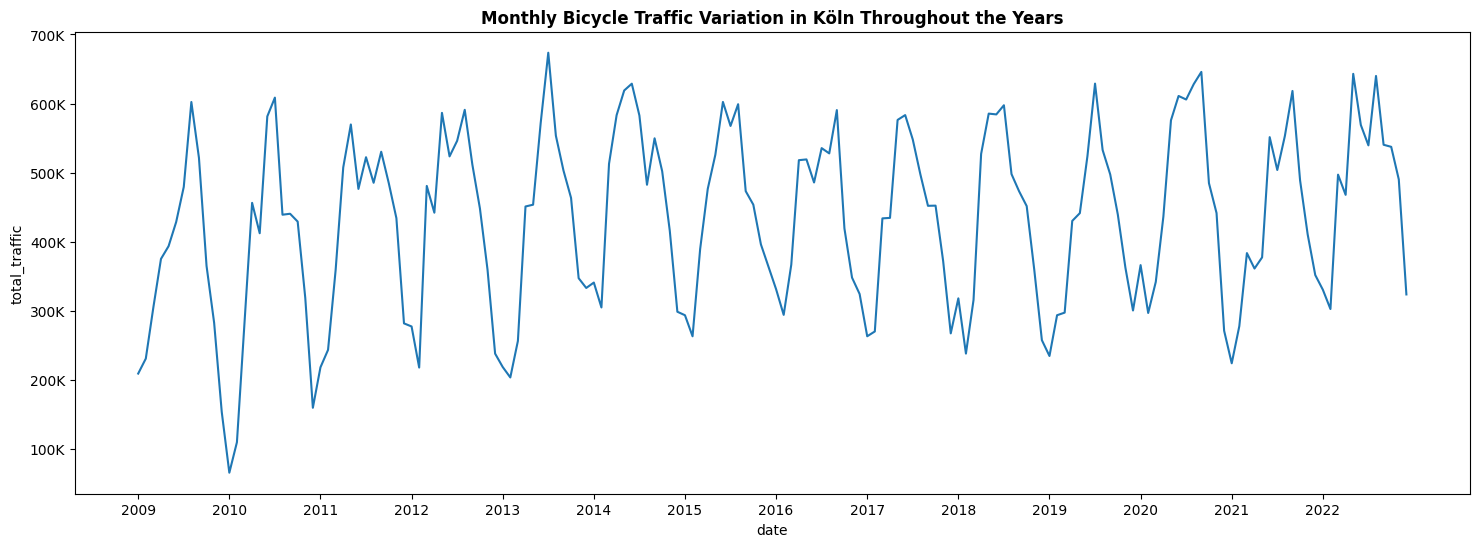

In [22]:
# Line plot of bicycle traffic variation
plt.figure(figsize=(18, 6))
sns.lineplot(data=final_combined_df, x='date', y='total_traffic')

plt.xlabel('date')
plt.ylabel('total_traffic')
plt.title('Monthly Bicycle Traffic Variation in Köln Throughout the Years', fontweight='bold')
plt.xticks(range(0, len(final_combined_df), 12), final_combined_df['date'].iloc[::12].str[-4:], rotation=0)
plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000) + 'K' for x in plt.gca().get_yticks()]) # Modify y-axis tick labels
plt.show()

Bicycle traffic in Köln city also displays variation throughout the years, reflecting the seasonal changes and potential influences of weather conditions. Similar to the temperature patterns, the bicycle traffic data exhibits fluctuations, with higher levels during favorable weather conditions and lower levels during unfavorable weather conditions. This suggests a relationship between weather and bicycle usage, where people tend to cycle more during pleasant weather conditions.

#### 8.3. Does temperature affect bicycle traffic in Köln city?

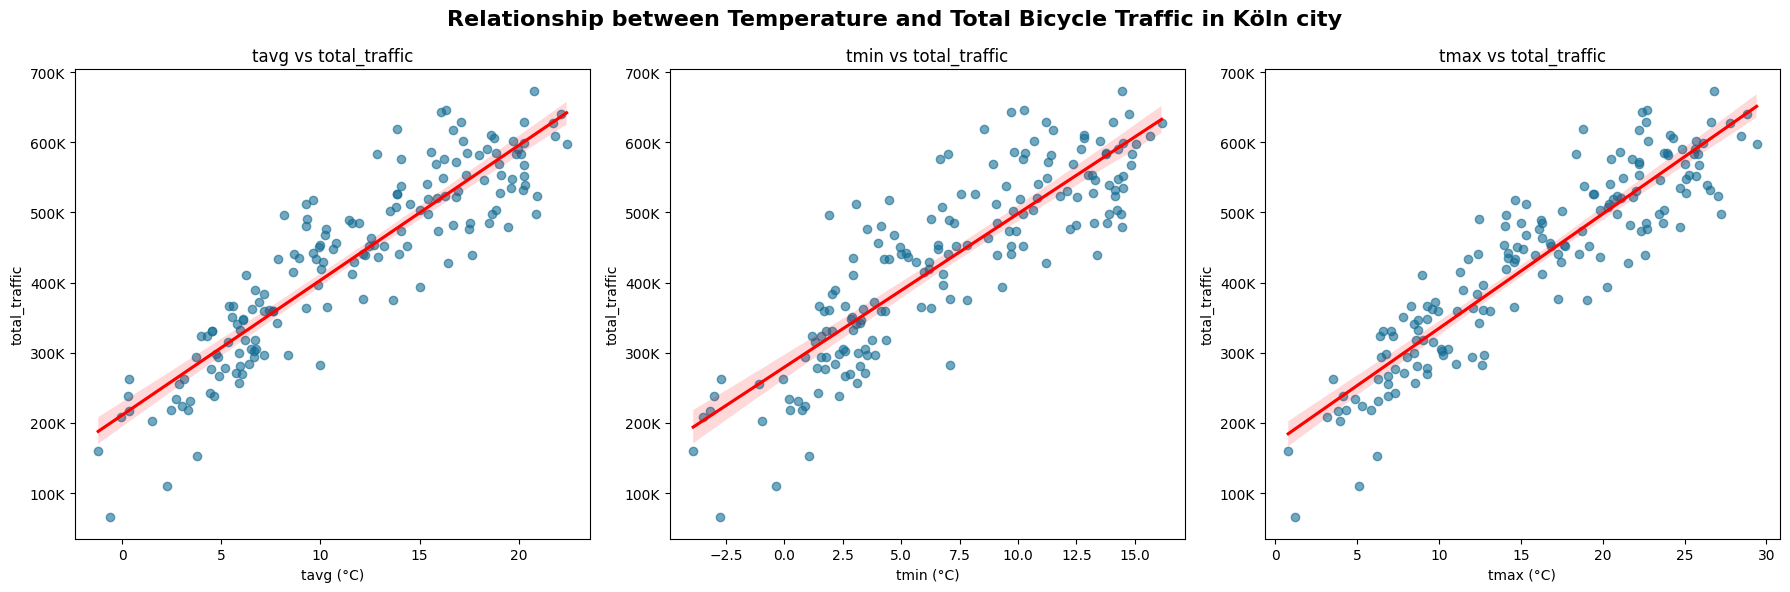

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, col in enumerate(['tavg', 'tmin', 'tmax']):
    ax = axes[i]
    sns.regplot(data=final_combined_df, x=col, y='total_traffic', ax=ax,
                scatter_kws = {"color": "#146C94", "alpha": 0.6},
                line_kws = {"color": "red"},
                ci = 95)
    ax.set_title(f'{col} vs total_traffic')
    ax.set_xlabel(col+' (°C)')
    ax.set_ylabel('total_traffic')
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K' if y >= 1000 else '{:g}'.format(y)))

plt.suptitle('Relationship between Temperature and Total Bicycle Traffic in Köln city', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Temperature has a significant impact on bicycle traffic in Köln city. Through the analysis of temperature data (tavg, tmin, tmax) and bicycle traffic data, we observe a clear relationship between temperature and bicycle usage. As temperatures rise, indicating warmer weather, bicycle traffic tends to increase as well. Conversely, during colder temperatures, bicycle traffic decreases. This correlation suggests that temperature is a driving factor in influencing people's decision to use bicycles for transportation.

#### 8.4. Is there any relation between the monthly precipitation total and average sea-level air pressure on the total bicycle traffic in Köln?

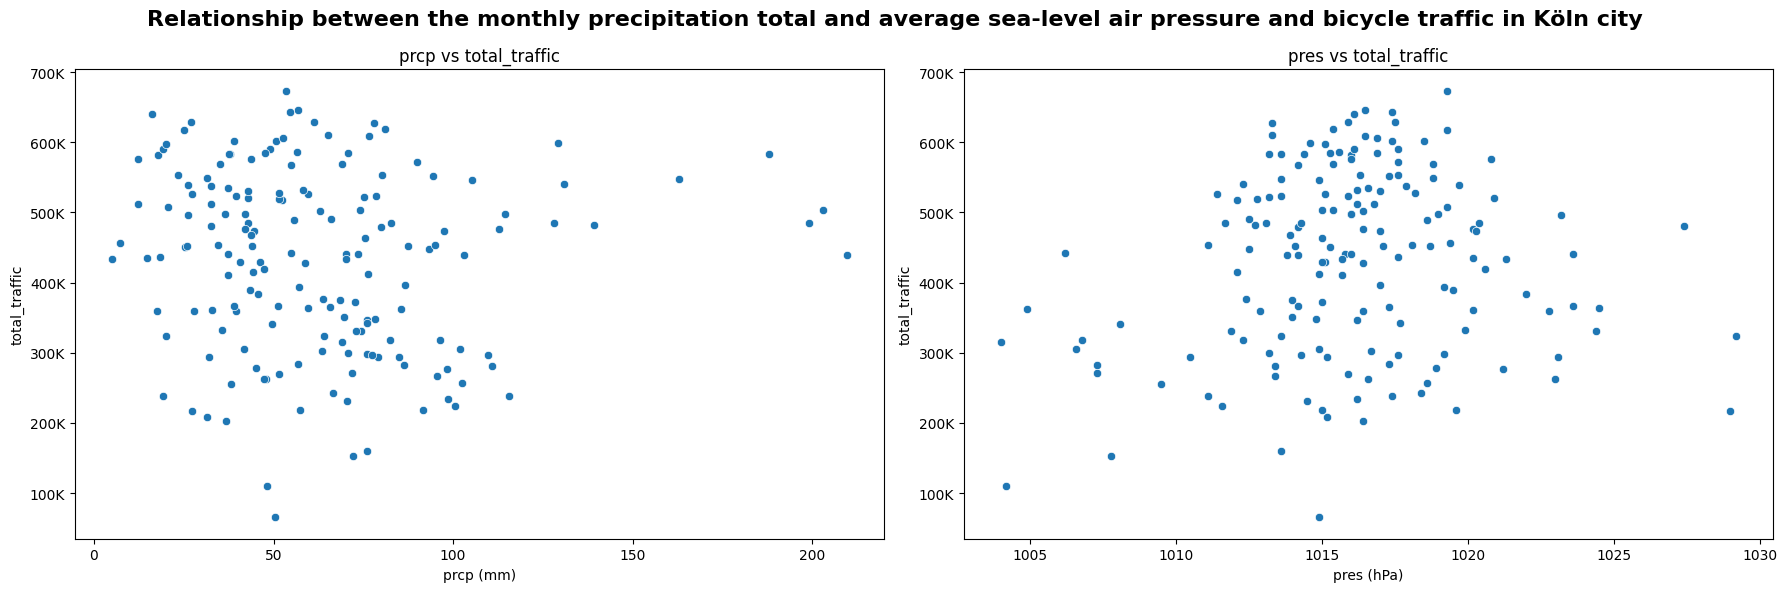

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for i, col_details in enumerate([('prcp', 'prcp (mm)'), ('pres', 'pres (hPa)')]):
    col, col_name = col_details
    ax = axes[i]
    sns.scatterplot(data=final_combined_df, x=col, y='total_traffic', ax=ax)
    ax.set_title(f'{col} vs total_traffic')
    ax.set_xlabel(col_name)
    ax.set_ylabel('total_traffic')
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K' if y >= 1000 else '{:g}'.format(y)))

plt.suptitle('Relationship between the monthly precipitation total and average sea-level air pressure and bicycle traffic in Köln city', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

No significant relation is found between the monthly precipitation total and bicycle traffic in Köln city. Despite variations in precipitation levels throughout the year, there is no clear pattern or direct correlation between the two variables. Similarly, no strong relationship is observed between the average sea-level air pressure and total bicycle traffic.

#### 8.5. How do wind speed and sunshine duration impact the total bicycle traffic in Köln?

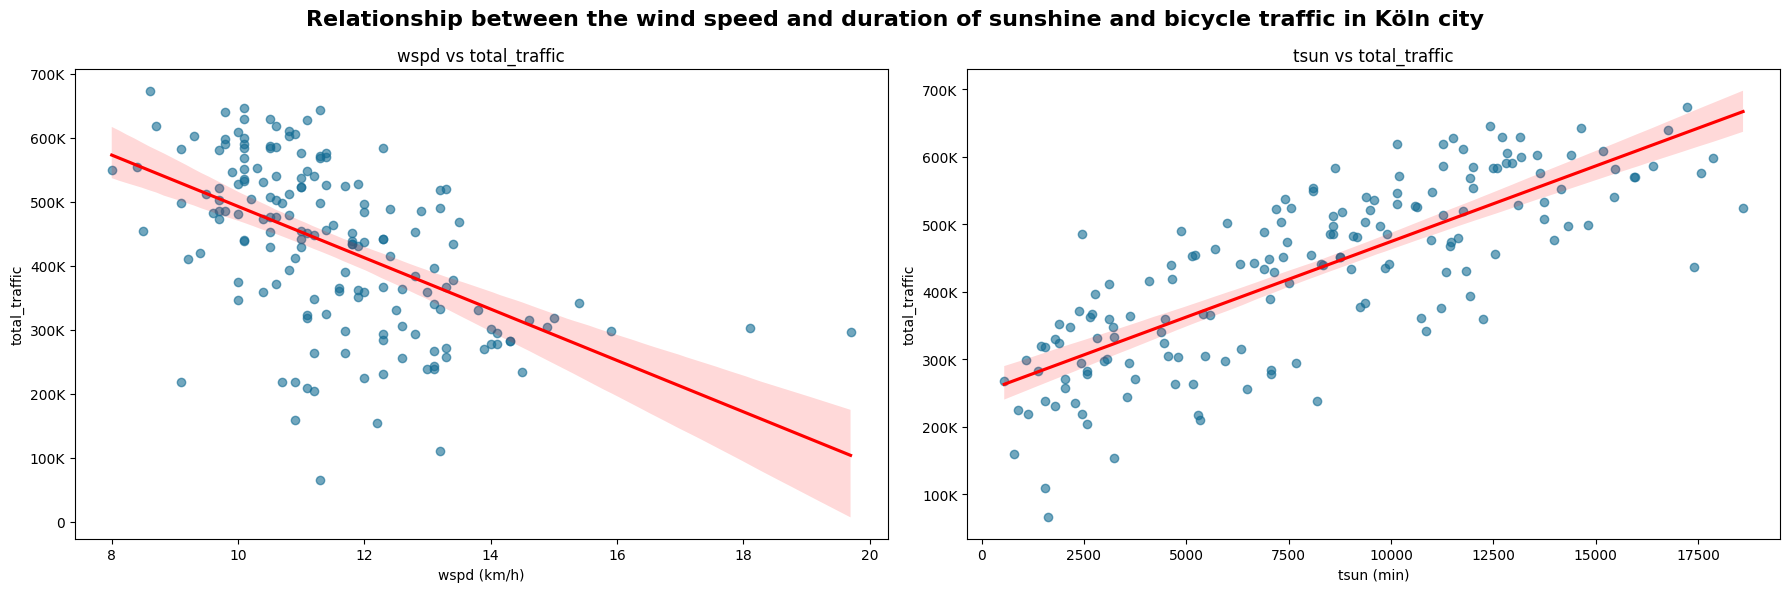

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for i, col_details in enumerate([('wspd', 'wspd (km/h)'), ('tsun', 'tsun (min)')]):
    col, col_name = col_details
    ax = axes[i]
    sns.regplot(data=final_combined_df, x=col, y='total_traffic', ax=ax,
                scatter_kws = {"color": "#146C94", "alpha": 0.6},
                line_kws = {"color": "red"},
                ci = 95)
    ax.set_title(f'{col} vs total_traffic')
    ax.set_xlabel(col_name)
    ax.set_ylabel('total_traffic')
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K' if y >= 1000 else '{:g}'.format(y)))

plt.suptitle('Relationship between the wind speed and duration of sunshine and bicycle traffic in Köln city', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Wind speed and sunshine duration have distinct effects on the total bicycle traffic in Köln. There is a reverse relationship between wind speed and bicycle traffic, indicating that as wind speed increases, bicycle traffic tends to decrease, and vice versa. This suggests that strong winds may deter people from cycling or affect their comfort and safety while cycling. On the other hand, there is a positive correlation between sunshine duration and bicycle traffic. As the duration of sunshine increases, bicycle traffic tends to rise, suggesting that favorable weather conditions with more sunlight encourage people to use bicycles for commuting and recreational purposes.

### 9. Conclusion

In this project, we explored the relationship between weather conditions and bicycle traffic in Köln city. Our analysis revealed the following key findings:

- Temperature plays a crucial role in influencing bicycle traffic, with higher temperatures leading to increased usage and vice versa.
- No significant correlation was found between monthly precipitation total, average sea-level air pressure, and bicycle traffic.
- Wind speed negatively impacts bicycle traffic, while longer sunshine durations positively affect it.

These insights provide valuable information for policymakers and urban planners seeking to promote cycling as a sustainable transportation option. By considering the impact of weather conditions on bicycle usage, city officials can make informed decisions to create a more bicycle-friendly environment in Köln.